In [1]:
from clustering_script import *

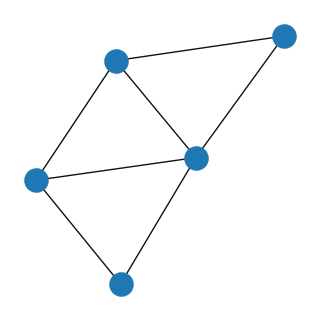

In [2]:
G = nx.erdos_renyi_graph(5, 0.5)
plt.figure(figsize=(3,3))
nx.draw(G)

In [3]:
posdf_from_layout(G, 'davidson_harel')

DAVIDSON HAREL
          X         Y
0 -1.000000  0.088011
1  0.635850  0.098713
2 -0.161348 -0.500977
3 -0.536980  1.000000
4  1.000000 -1.000000


,X,Y
0,-1.000000,0.088011
1,0.635850,0.098713
2,-0.161348,-0.500977
3,-0.536980,1.000000
4,1.000000,-1.000000
